## Import Packages

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import visuals as vp
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

### Load Data

In [6]:
df = pd.read_csv('dermatology.csv',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
0     366 non-null int64
1     366 non-null int64
2     366 non-null int64
3     366 non-null int64
4     366 non-null int64
5     366 non-null int64
6     366 non-null int64
7     366 non-null int64
8     366 non-null int64
9     366 non-null int64
10    366 non-null int64
11    366 non-null int64
12    366 non-null int64
13    366 non-null int64
14    366 non-null int64
15    366 non-null int64
16    366 non-null int64
17    366 non-null int64
18    366 non-null int64
19    366 non-null int64
20    366 non-null int64
21    366 non-null int64
22    366 non-null int64
23    366 non-null int64
24    366 non-null int64
25    366 non-null int64
26    366 non-null int64
27    366 non-null int64
28    366 non-null int64
29    366 non-null int64
30    366 non-null int64
31    366 non-null int64
32    366 non-null int64
33    366 non-null object
34    366 non-null int64
dtypes: int64(34), 

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### Data Cleaning

> #### Check Null Value

In [8]:
#check for null values
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

> #### Check Duplicate Rows

In [9]:
sum(df.duplicated())

0

> #### Statistics Detail

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,34
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


> #### Rename The Column Names

In [11]:
newNames = ['erythema','scaling','definite_borders','itching','koebner_phenomenon',
           'polygonal_papules','follicular_papules','oral_mucosal_involvement','knee_elbow_involvement','scalp_involvement','family_history',
                'melanin','eosinophils','PNL','fibrosis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing','elongation','suprapapillary_epidermis',
               'spongiform_pustule','munro_microabcess','focal_hypergranulosis','granular_layer','basal_layer','spongiosis','saw-tooth','follicular','perifollicular','inflammatory_monoluclear',
               'band-like infiltrate','Age','target']
for i in range(35):
    df.rename(columns={i: newNames[i]},inplace=True)

> Age column contains a special char('?'). We have to remove it, we can remove the entire row which contain that charecter or we can fill it with the mean or median value. 

In [12]:
df = df.loc[df.Age!='?']
df.shape

(358, 35)

In [13]:
df.Age = df.Age.astype('int64')

In [14]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,granular_layer,basal_layer,spongiosis,saw-tooth,follicular,perifollicular,inflammatory_monoluclear,band-like infiltrate,Age,target
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### EDA 
> Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [15]:
group_map = {1: "psoriasis", 2: "seboreic_dermatitis", 3: "lichen_planus", 4: "pityriasis_rosea",
             5: "cronic_dermatitis", 6: 'pityriasis_rubra'}
df['target'] = df['target'].map(group_map)

> #### Count of Different Target Values

Text(0.5, 0, 'Skin Disease')

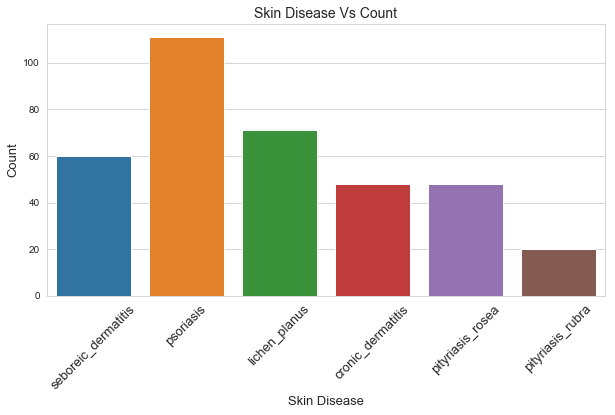

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['target'])
plt.xticks(rotation=45,fontsize=13)
plt.title('Skin Disease Vs Count',fontsize=14)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Skin Disease',fontsize=13)

> #### Distribution of Age According to Disease

Text(0.5, 1.0, 'Distribution Of Age According Skin Disease')

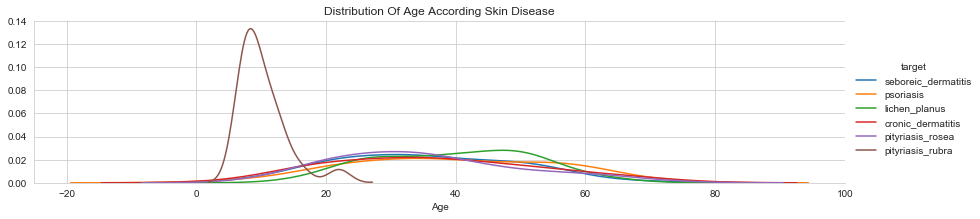

In [20]:
facet = sns.FacetGrid(df,hue="target",aspect=4)
facet.map(sns.kdeplot,'Age',shade= False).add_legend()
plt.title('Distribution Of Age According Skin Disease')

Text(0.5, 1.0, 'Skin Disease Vs Itching Factor')

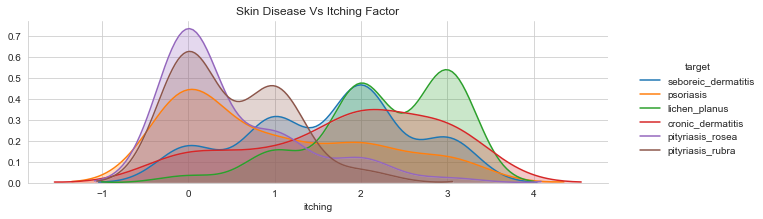

In [157]:
sns.FacetGrid(df,hue="target",aspect=3,margin_titles=True).map(sns.kdeplot,'itching',shade= True).add_legend()
plt.title('Skin Disease Vs Itching Factor')

> #### Is the Disease Due to Family Genes?

0    314
1     44
Name: family_history, dtype: int64


Text(0.5, 1.0, 'Family History Vs Count')

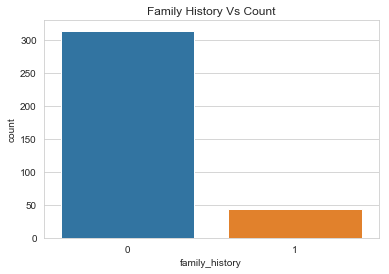

In [159]:
print(df.family_history.value_counts())
sns.countplot(df.family_history)
plt.title('Family History Vs Count')

Text(0.5, 0, 'Skin Disease')

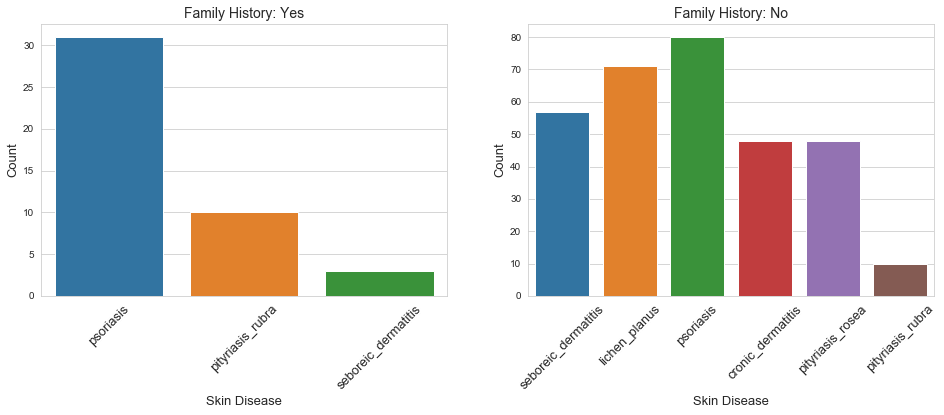

In [160]:
family_h = df.loc[df.family_history==1]
family_nh = df.loc[df.family_history==0]

fig = plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(family_h['target'])
plt.xticks(rotation=45,fontsize=13)
plt.title('Family History: Yes',fontsize=14)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Skin Disease',fontsize=13)

plt.subplot(122)
sns.countplot(family_nh['target'])
plt.title('Family History: No',fontsize=14)
plt.xticks(rotation=45,fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Skin Disease',fontsize=13)

In [35]:
group_map = {"psoriasis":1, "seboreic_dermatitis":2, "lichen_planus":3, "pityriasis_rosea":4,
             "cronic_dermatitis":5, 'pityriasis_rubra':6}
df['target'] = df['target'].map(group_map)

> #### Correlation Heatmap

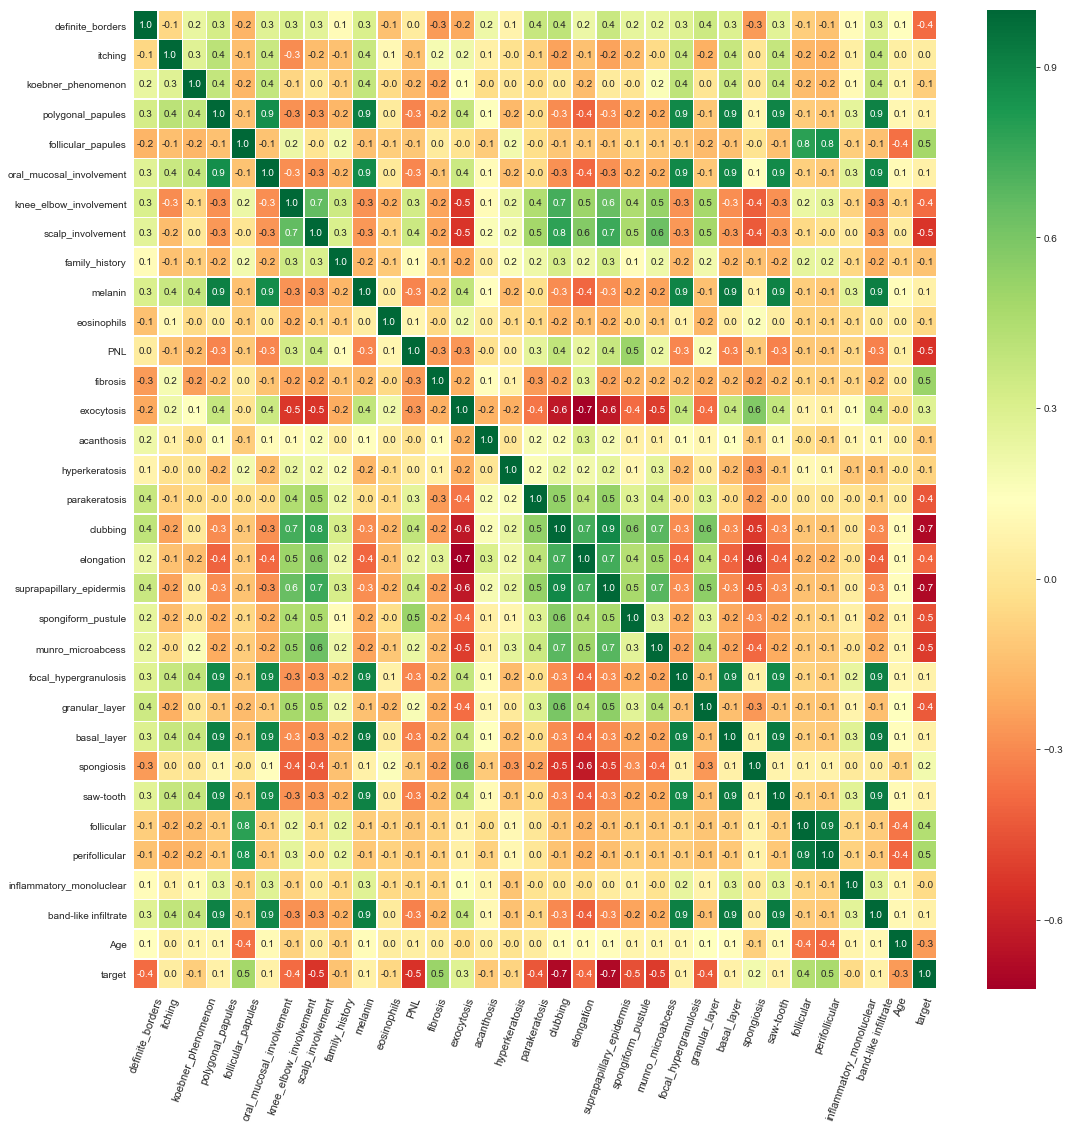

In [96]:
#correlation map
fig = plt.figure(figsize=(18, 18))
sns.heatmap(df.iloc[:,2:].corr(),cmap="RdYlGn",annot=True, linewidths=.5, fmt= '.1f')
plt.xticks(fontsize=11,rotation=70)
plt.show()

### Machine Learning: Classification

> #### Building Feature Set

In [37]:
X = df.drop('target',axis=1).values
y = df['target'].values

#X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

> #### Logistic Regression

In [42]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

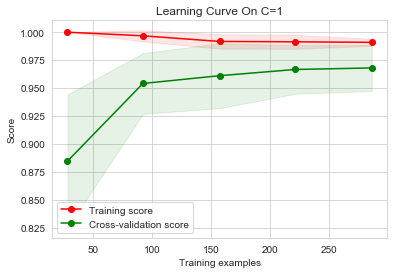

In [57]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
vp.plot_learning_curve(reg,'Learning Curve On C=1',X, y, cv=cv)

In [46]:
y_pred = reg.predict(X_test)
print("test accuracy: {} ".format(accuracy_score(y_pred,y_test)))

test accuracy: 0.9861111111111112 


> #### Selection of Regularization parameter (C)

In [215]:
# sklearn
traina = []
testa = []

for i in range(1,101):
    logreg = linear_model.LogisticRegression(random_state = 42,C=i)
    logreg.fit(X_train,y_train)
    traina.append(logreg.score(X_train, y_train))
    testa.append(logreg.score(X_test, y_test))
print("test accuracy: {} ".format(logreg.score(X_test, y_test)))
print("train accuracy: {} ".format(logreg.score(X_train, y_train)))

test accuracy: 0.9722222222222222 
train accuracy: 1.0 


Text(0, 0.5, 'Accuracy')

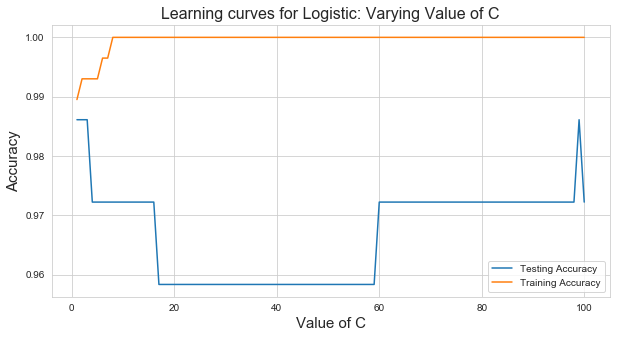

In [216]:
C = np.arange(1,101)

plt.figure(figsize=(10,5))
plt.title('Learning curves for Logistic: Varying Value of C', size=16)
plt.plot(C, testa,label = 'Testing Accuracy')
plt.plot(C, traina, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Value of C', size=15)
plt.ylabel('Accuracy', size=15)

> #### hyperparameter Tunning With GridSearchCV
>- hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

In [79]:
reg = LogisticRegression()
params = {'C':range(1,100)}
grid = GridSearchCV(reg,params,cv = 10)
grid

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [80]:
grid = grid.fit(X_train, y_train)

In [81]:
grid.best_estimator_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

> #### Optimal Model

In [92]:
reg = LogisticRegression(C=2)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("test accuracy: {} ".format(accuracy_score(reg.predict(X_test), y_test)))

test accuracy: 0.9861111111111112 


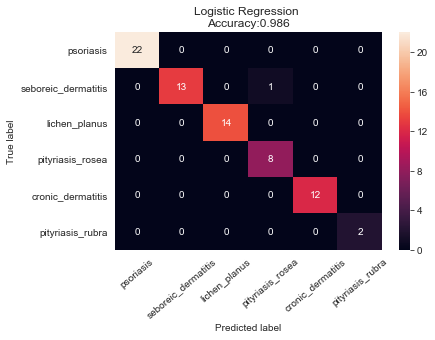

In [93]:
target = ["psoriasis","seboreic_dermatitis","lichen_planus","pityriasis_rosea",
             "cronic_dermatitis",'pityriasis_rubra']
cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = target, 
                     columns = target)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xticks(rotation=40)
plt.xlabel('Predicted label')
plt.show()